In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters-baseball-data/Hitters.csv


In [2]:
df_baseball=pd.read_csv('../input/hitters-baseball-data/Hitters.csv')

In [3]:
df_baseball

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df_baseball.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [6]:
(df_baseball.isnull().sum()/df_baseball.shape[0])*100

AtBat         0.000000
Hits          0.000000
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         0.000000
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.000000
CRuns         0.000000
CRBI          0.000000
CWalks        0.000000
League        0.000000
Division      0.000000
PutOuts       0.000000
Assists       0.000000
Errors        0.000000
Salary       18.322981
NewLeague     0.000000
dtype: float64

The only feature which has missing values is of **Salary** and as the missing values is less than 20%, central tendency imputation will work well.

In [7]:
df_baseball[df_baseball.Salary.isnull()]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


Before Imputation it is better to check correlation between features.


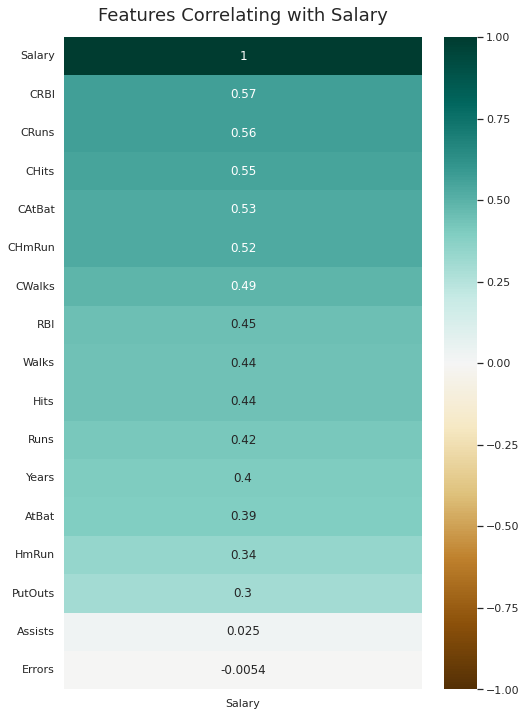

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_baseball.corr()[['Salary']].sort_values(by='Salary',ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Salary', fontdict={'fontsize':18}, pad=16);



As the salary feature is highly correlated with CRBI,CRuns,CHits,CAtBat,ChmRun.We will subset the dataset for similar kind of correlated feature and impute accordingly.

In [9]:
df_baseball.Salary=df_baseball.Salary.fillna(value=df_baseball.Salary.mean())

In [10]:
features_cat=[]
features_num=[]
for feature in df_baseball.columns:
    if df_baseball[feature].dtype=='object':
        features_cat.append(feature)
    else:
        features_num.append(feature)



In [11]:
features_cat

['League', 'Division', 'NewLeague']

In [12]:
features_num

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [13]:
def plot_outlier(c):
    plt.figure(figsize = (9,3))
    sns.boxplot(x=c,data=df_baseball)
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.title("{} outlier distribution of ".format(c))
    plt.show()

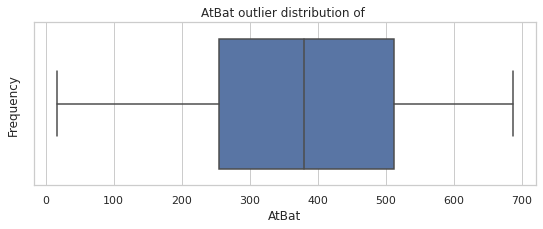

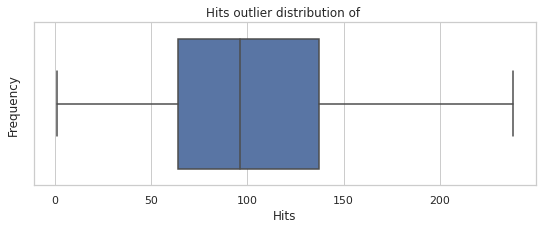

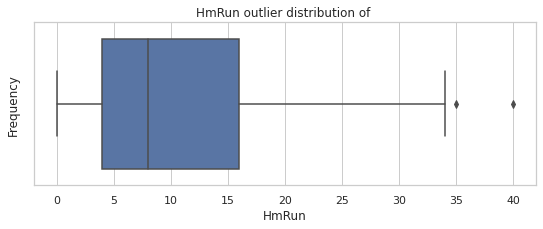

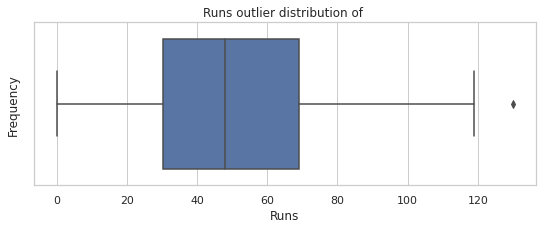

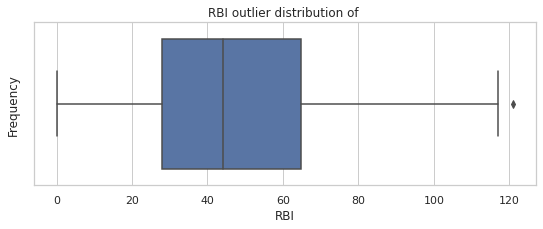

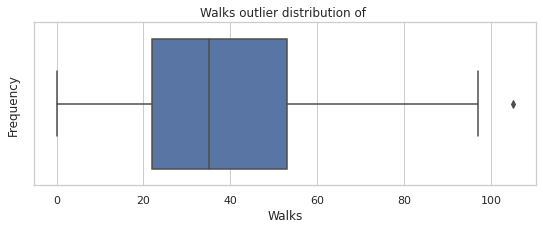

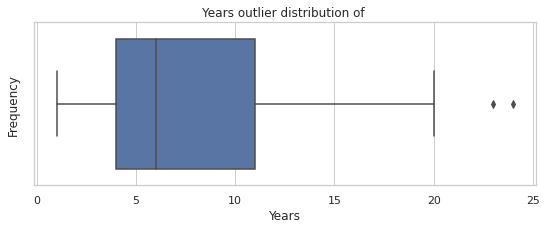

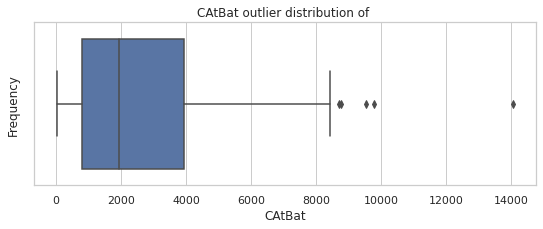

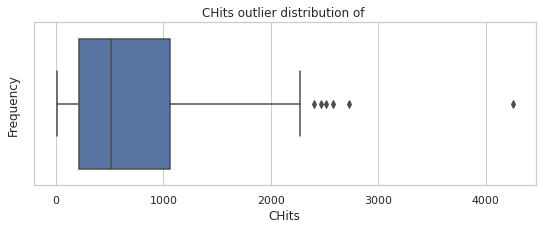

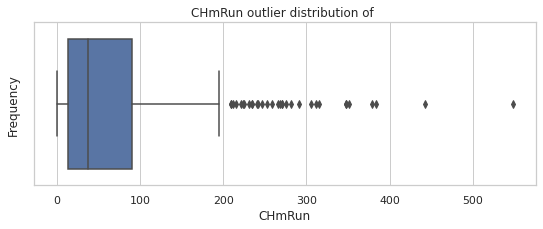

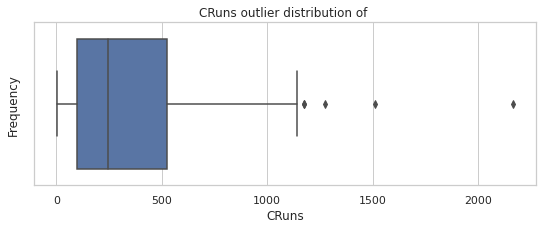

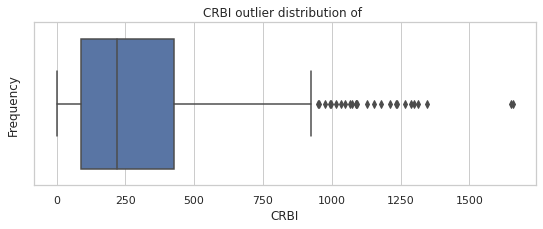

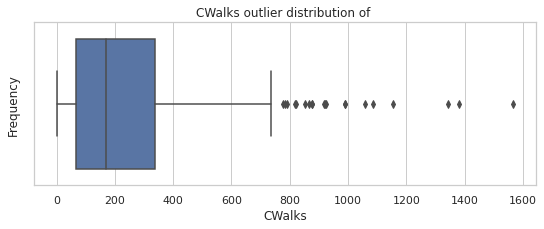

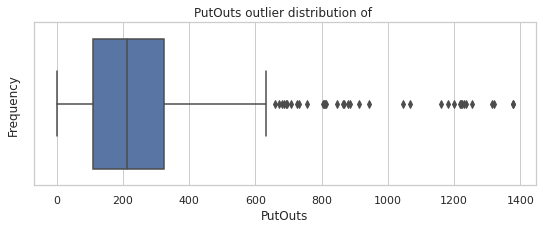

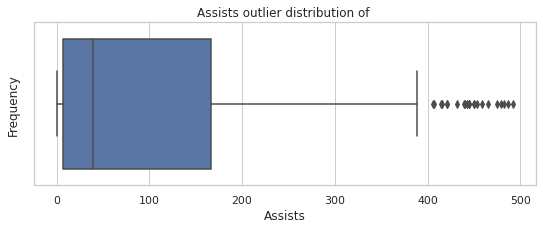

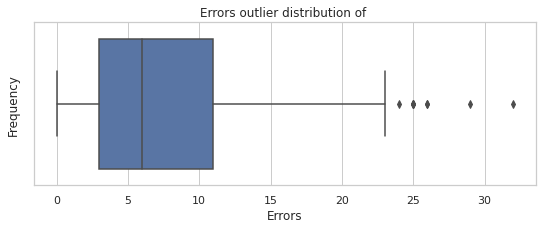

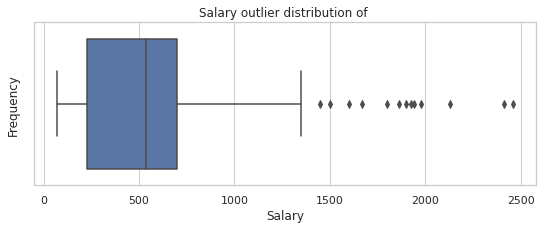

In [14]:


for c in features_num:
    plot_outlier(c)



In [15]:
def remove_outlier(features):
    for c in features:
        IQR=df_baseball[c].quantile(0.75)-df_baseball[c].quantile(0.25)
        min_c=df_baseball[c].quantile(0.25)-1.5*IQR
        max_c=df_baseball[c].quantile(0.75)+1.5*IQR
        mask=(df_baseball[c]<min_c) | (df_baseball[c]>max_c)
        df_baseball[c+" new"]=df_baseball[mask]
        

In [16]:
# remove_outlier(features_num)

In [17]:
features_cat

['League', 'Division', 'NewLeague']

In [18]:
df_baseball.League.nunique()

2

In [19]:
df_baseball.Division.nunique()

2

In [20]:
df_baseball.NewLeague.nunique()

2

In [21]:
df_league=pd.get_dummies(df_baseball.League,drop_first=True)
df_division=pd.get_dummies(df_baseball.Division,drop_first=True)
df_newleague=pd.get_dummies(df_baseball.NewLeague,drop_first=True)

In [22]:
df_new=pd.concat([df_baseball,df_league,df_division,df_newleague],axis=1)

In [23]:
df_new.drop(['League','Division','NewLeague'],axis=1,inplace=True)

In [24]:
df_new

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,N,W,N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,535.925882,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.000000,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.000000,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.000000,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.000000,0,0,0


In [25]:
Y=df_new.Salary
df_new.drop(['Salary'],axis=1,inplace=True)

In [26]:
X=df_new

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()
scaler.fit_transform(X)



array([[0.41281669, 0.2742616 , 0.025     , ..., 0.        , 0.        ,
        0.        ],
       [0.44560358, 0.33755274, 0.175     , ..., 1.        , 1.        ,
        1.        ],
       [0.6900149 , 0.5443038 , 0.45      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.68405365, 0.52742616, 0.075     , ..., 0.        , 1.        ,
        0.        ],
       [0.83010432, 0.60337553, 0.225     , ..., 0.        , 0.        ,
        0.        ],
       [0.91654247, 0.71308017, 0.225     , ..., 0.        , 1.        ,
        0.        ]])

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

In [30]:
from sklearn.linear_model import Ridge,Lasso
ridge_regression=Ridge(alpha=0.5478)
lasso_regression=Lasso(alpha=0.5478)
ridge_regression.fit(X_train,y_train)
lasso_regression.fit(X_train,y_train)
y_pred_ridge=ridge_regression.predict(X_test)
y_pred_lasso=lasso_regression.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.499e+06, tolerance: 3.252e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.4841371422724907

In [32]:
r2_score(y_test,y_pred_lasso)

0.4846403082765357

**lasso performs slighlty better than ridge regression**